In [1]:
# from google.colab import files
# uploaded = files.upload()

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [3]:
data = pd.read_csv("AMZN_2006-01-01_to_2018-01-01.csv", parse_dates = ['Date'], index_col = 'Date')
data

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN
...,...,...,...,...,...,...
2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN
2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN
2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN


In [4]:
data.shape

(3019, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [6]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [7]:
print(data.index.min())
print(data.index.max())

2006-01-03 00:00:00
2017-12-29 00:00:00


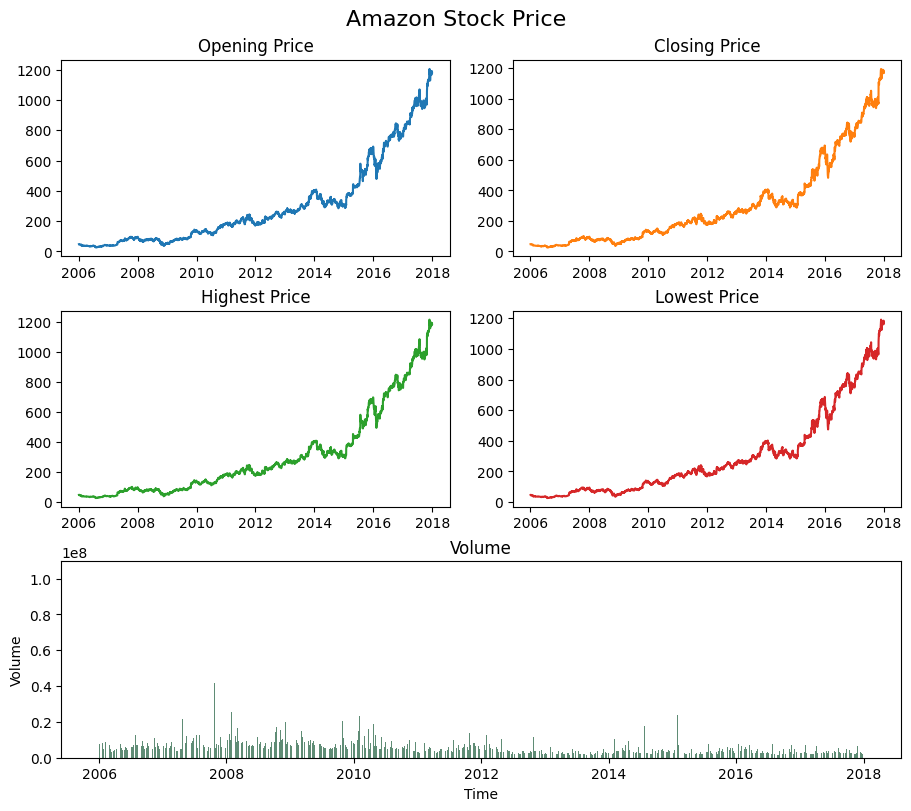

In [25]:
fig = plt.figure(figsize=(9, 8), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(spec[0, 0])
ax0.plot(data['Open'])
ax0.set_title('Opening Price')

ax0 = fig.add_subplot(spec[0, 1])
ax0.plot(data['Close'], 'tab:orange')
ax0.set_title('Closing Price')

ax10 = fig.add_subplot(spec[1, 0])
ax10.plot(data['High'], 'tab:green')
ax10.set_title('Highest Price')

ax11 = fig.add_subplot(spec[1, 1])
ax11.plot(data['Low'], 'tab:red')
ax11.set_title('Lowest Price')

ax2 = fig.add_subplot(spec[2, :])
ax2.bar(data.index, data['Volume'], color = (0.3, 0.5, 0.4, 0.9))
ax2.set_title('Volume')
ax2.set_xlabel('Time')
ax2.set_ylabel('Volume')

fig.suptitle('Amazon Stock Price', fontsize=16)

plt.show()

In [56]:
def decompose(df, column_name):

    result_mul = seasonal_decompose(df[column_name], model='multiplicative', period = 60)
    result_add = seasonal_decompose(df[column_name], model = 'additive', period = 60)

    plt.rcParams.update({'figure.figsize': (9, 8)})
    result_mul.plot()
    result_add.plot()
    plt.show()

    return result_mul, result_add

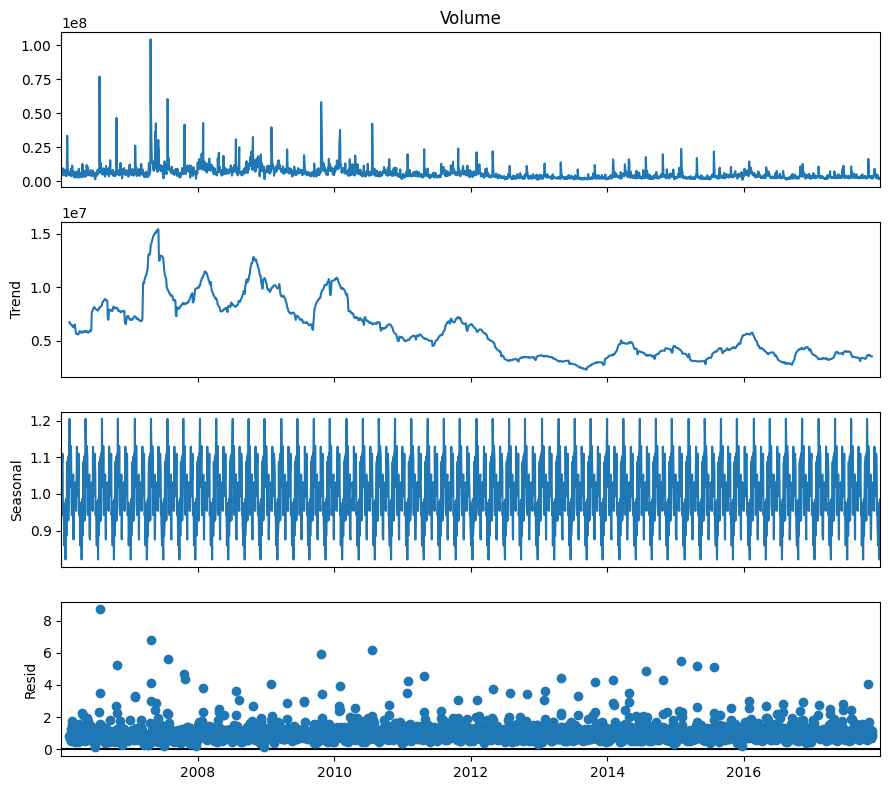

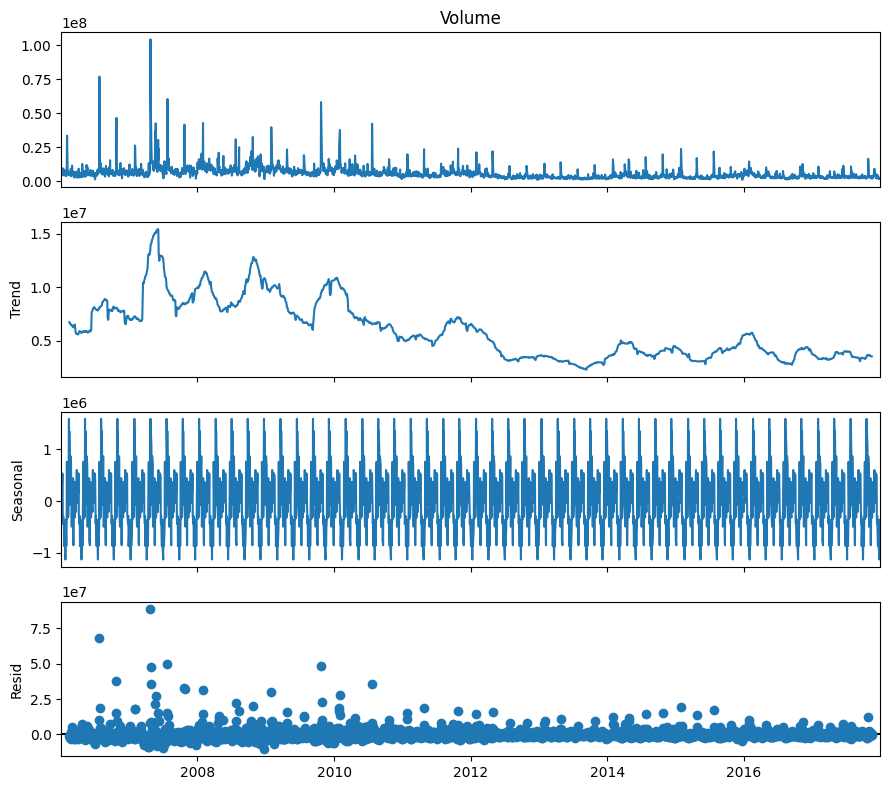

In [57]:
result_mul, result_add = decompose(data, 'Volume')

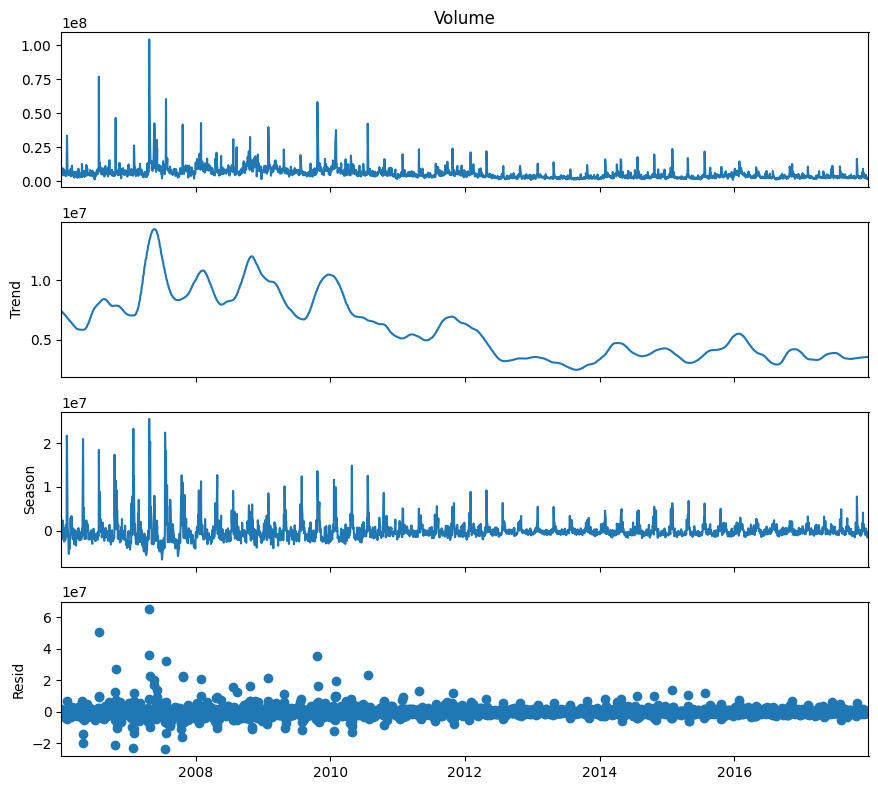

In [55]:
from statsmodels.tsa.seasonal import STL
res = STL(data['Volume'], period = 60).fit()
res.plot()
plt.show()

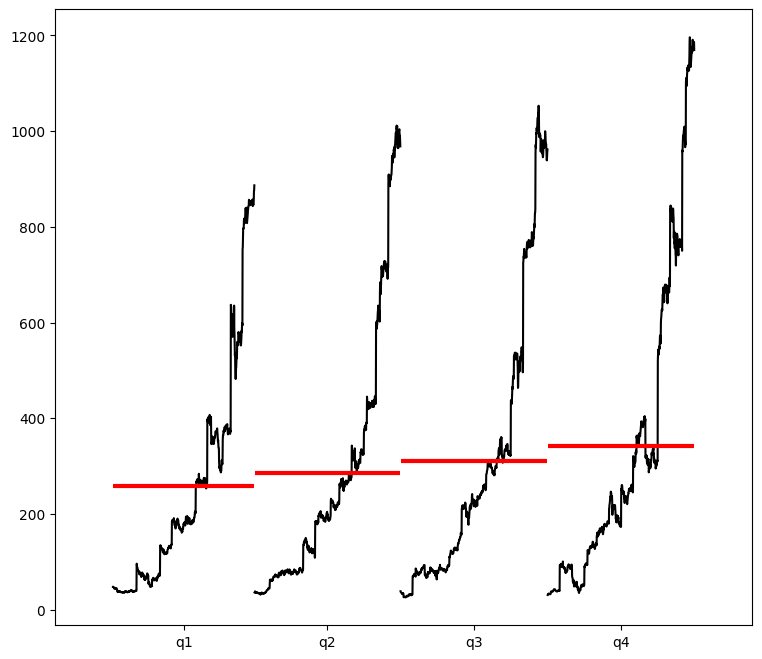

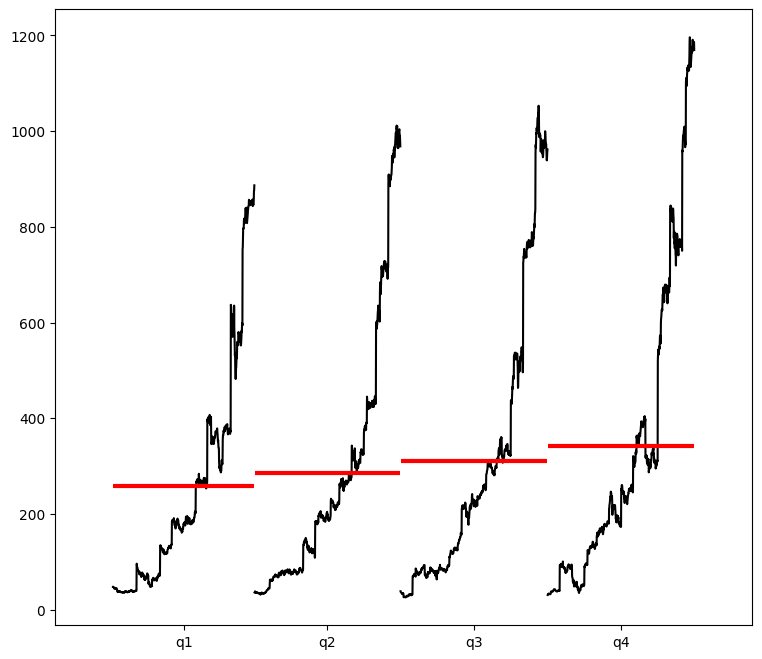

In [37]:
from statsmodels.graphics.tsaplots import quarter_plot
quarter_plot(data['Close'].values, dates=data.index)

In [38]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Quarter'] = data.index.quarter
data

,Open,High,Low,Close,Volume,Name,Year,Month,Quarter
Date,,,,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,2006,1,1
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,2006,1,1
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,2006,1,1
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,2006,1,1
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,2006,1,1
...,...,...,...,...,...,...,...,...,...
2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN,2017,12,4
2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN,2017,12,4
2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN,2017,12,4


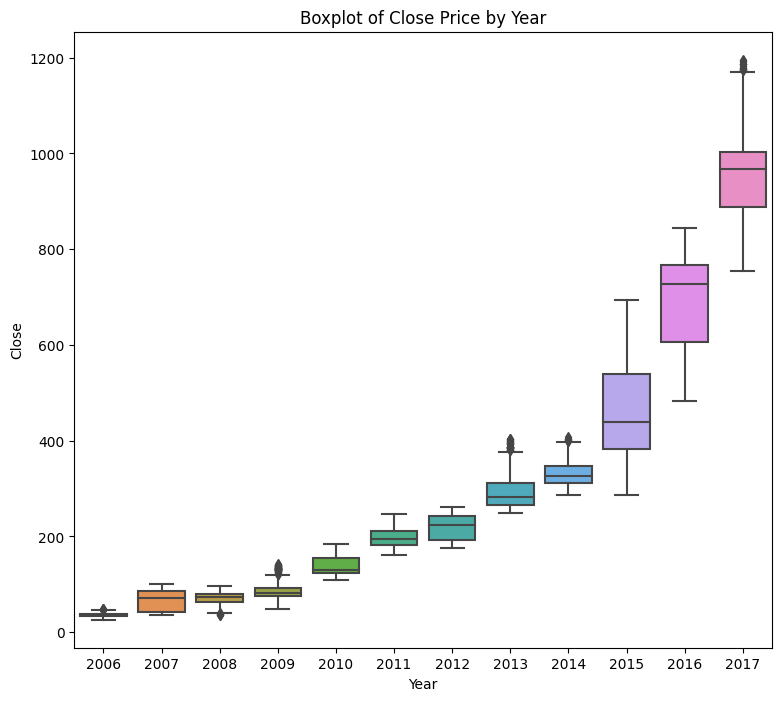

In [39]:
plt.figure(figsize=(9, 8))
sns.boxplot(x='Year', y='Close', data=data)
plt.title('Boxplot of Close Price by Year')
plt.show()

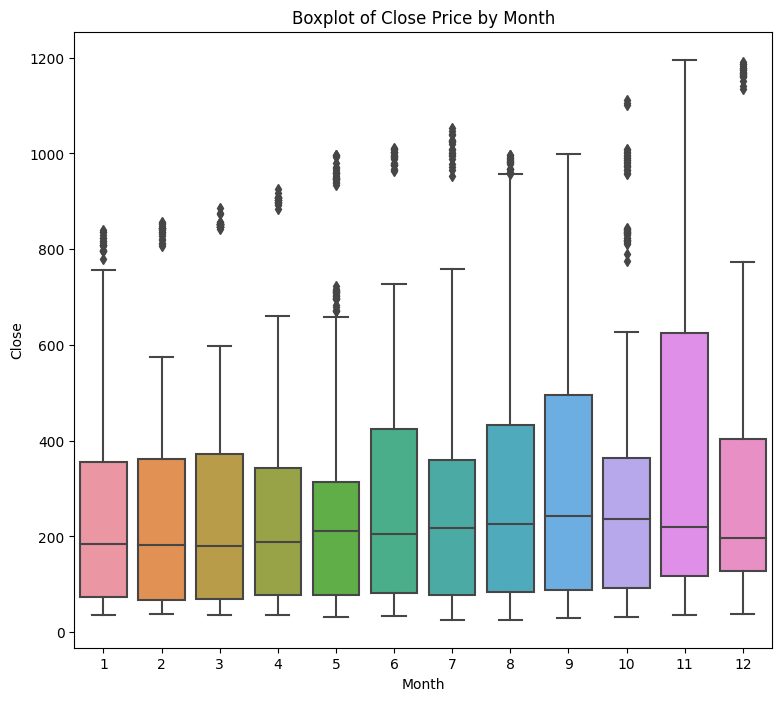

In [27]:
plt.figure(figsize=(9, 8))
sns.boxplot(x='Month', y='Close', data=data)
plt.title('Boxplot of Close Price by Month')
plt.show()

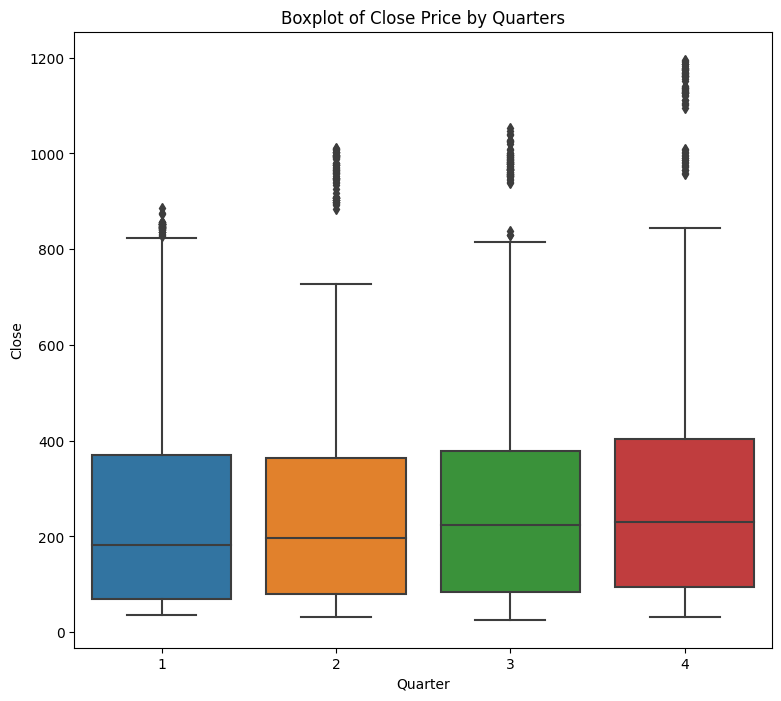

In [33]:
plt.figure(figsize=(9, 8))
sns.boxplot(x='Quarter', y='Close', data=data)
plt.title('Boxplot of Close Price by Quarters')
plt.show()